<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Numpy" data-toc-modified-id="Numpy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Numpy</a></span><ul class="toc-item"><li><span><a href="#Indexing-NumPy-Arrays" data-toc-modified-id="Indexing-NumPy-Arrays-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Indexing NumPy Arrays</a></span></li></ul></li><li><span><a href="#Building-and-Examining-NumPy-Arrays" data-toc-modified-id="Building-and-Examining-NumPy-Arrays-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Building and Examining NumPy Arrays</a></span><ul class="toc-item"><li><span><a href="#Shape-and-Size-of-Numpy-Arrays" data-toc-modified-id="Shape-and-Size-of-Numpy-Arrays-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Shape and Size of Numpy Arrays</a></span></li></ul></li><li><span><a href="#Introduction-to-Matplotlib-and-Pyplot" data-toc-modified-id="Introduction-to-Matplotlib-and-Pyplot-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Introduction to Matplotlib and Pyplot</a></span></li><li><span><a href="#Randomness-and-Time" data-toc-modified-id="Randomness-and-Time-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Randomness and Time</a></span><ul class="toc-item"><li><span><a href="#Examples-Involving-Randomness" data-toc-modified-id="Examples-Involving-Randomness-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Examples Involving Randomness</a></span></li></ul></li><li><span><a href="#NumPy-Random-Module" data-toc-modified-id="NumPy-Random-Module-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>NumPy Random Module</a></span></li><li><span><a href="#Measuring-Time" data-toc-modified-id="Measuring-Time-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Measuring Time</a></span></li><li><span><a href="#Random-Walks" data-toc-modified-id="Random-Walks-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Random Walks</a></span></li></ul></div>

## Numpy 

### Indexing NumPy Arrays

NumPy arrays can also be indexed with other arrays
or other sequence-like objects like lists.

In [660]:
import numpy as np

z1 = np.array([1,3,5,7,9])

z2 = z1 + 1

print("z1:", z1)
print("z2:", z2)



z1: [1 3 5 7 9]
z2: [ 2  4  6  8 10]


In [661]:
# indexing using a list

ind = [0,2,3]

print(z1[ind])

print(z2[ind])


[1 5 7]
[2 6 8]


In [662]:
# indexing using an array

ind = np.array([0,2,3])

print(z1[ind])

print(z2[ind])

[1 5 7]
[2 6 8]


NumPy arrays can also be indexed using logical indices

Just as we can have an array of numbers, we can have an array consisting of true and false, which are two Boolean elements.

In [663]:
z1 = np.array([1,3,5,7,9])
z1 > 6 

array([False, False, False,  True,  True])

We can use the Boolean array, also called a logical array, to index another vector.

Python returns those elements of the array for which the corresponding value in the Boolean vector is true.

In [664]:
z1[z1 > 6]

array([7, 9])

But I can also do the same to my array z2.

Now let's think about this, what's happening here.

My index vector is still identifying those elements of z1 that happened to be greater than six.

Now in this case, I am however, using that index vector to access elements in my array z2.

In [665]:
z2[z1 > 6]

array([ 8, 10])

When you slice an array using the colon operator, you get a view of the object.

This means that if you modify it, the original array will also be modified.

This is in contrast with what happens when you index an array, in which case what is returned to you is a copy of the original data.

In [666]:
# Slicing will change the orginial contents

z1 = np.array([1,3,5,7,9])

w = z1[0:3]

print("w:", w)

w[0] = 3

print("w:", w)
print("z1:", z1)

w: [1 3 5]
w: [3 3 5]
z1: [3 3 5 7 9]


In [667]:
# Indexing won't change the original contents

z1 = np.array([1,3,5,7,9])
ind = np.array([0,1,2])

print("z1:", z1)
print("ind:", ind)

w = z1[ind]
print("w:", w)

w[0] = 3

print("w:", w)
print("z1:", z1)

z1: [1 3 5 7 9]
ind: [0 1 2]
w: [1 3 5]
w: [3 3 5]
z1: [1 3 5 7 9]


In summary, for all cases of indexed arrays, what is returned is a copy of the original data, not a view as one gets for slices.


Consider the following code:

```python
a = np.array([1,2])
b = np.array([3,4,5])
b[a]

c = b[1:]
b[a] is c
```
What does Python return? ==> False


In [668]:
a = np.array([1,2])
b = np.array([3,4,5])
b[a]

c = b[1:]
b[a] is c

False

## Building and Examining NumPy Arrays

NumPy provides a couple of ways to construct arrays with fixed, start, and end values, such that the other elements are uniformly spaced between them.

To construct an array of 10 linearly spaced elements starting with 0 and ending with 100, we can use the NumPy linspace function.

In [669]:
np.linspace(0, 100, 10)

array([  0.        ,  11.11111111,  22.22222222,  33.33333333,
        44.44444444,  55.55555556,  66.66666667,  77.77777778,
        88.88888889, 100.        ])

Now, to construct an average of 10 logarithmically spaced elements between 10 and 100, we can do the following.

In this case we use the NumPy logspace command.

But now careful, the first argument that goes into logspace is going to be the log of the starting point.

If you want the sequence to start at 10, the first argument has to be the log of 10 which is 1.

The second argument is the endpoint of the array, which is 100.

And again, we need to put in the log of that, which is 2.

And the third argument as before, is the number of elements in our array.

in this case, what NumPy has constructed is an array consisting of 10 elements where the first element is 10 and the last element is 100.

All of the other elements are uniformly spaced between those two extreme points in the logarithmic space.

In [670]:
np.logspace(1, 2, 10)

array([ 10.        ,  12.91549665,  16.68100537,  21.5443469 ,
        27.82559402,  35.93813664,  46.41588834,  59.94842503,
        77.42636827, 100.        ])

To construct array of ten logarithmically spaced elements between numbers say 250 and 500, we first need to take the base 10 logarithm of the numbers, 250 and 500, and then feed those into the logspace function.

In [671]:
np.logspace(np.log10(250), np.log10(500), 10)

array([250.        , 270.01493472, 291.63225989, 314.98026247,
       340.19750004, 367.43362307, 396.85026299, 428.62199143,
       462.93735614, 500.        ])

### Shape and Size of Numpy Arrays

In [672]:
X = np.array([[1,2,3], [4,5,6]])
print("X - shape:", X.shape)
print("X - size:", X.size)

X - shape: (2, 3)
X - size: 6


NumPy has its own random module.

And in this case, we're going to be generating 10 random numbers drawn from the standard uniform distribution, meaning from the interval from 0 to 1.

In [673]:
X = np.random.random(10)
print(X)

[0.390662   0.09143834 0.16883444 0.71180406 0.12980941 0.40222828
 0.31249434 0.15458184 0.77421025 0.82526262]


And now we can use the np.any function to find out if any of the elements of x are greater than 0.9.

In [674]:
np.any(x > 0.9)

True

I can then use the np.all function to find out if all of the elements in the array are greater than or equal to 0.1.

In [675]:
np.all(x > 0.1)

True

Consider the following code:

```python
x = 20
not np.any([x%i == 0 for i in range(2, x)])
```
What does the above code do? ==> Finds whether x is prime.

In [676]:
x = 20
not np.any([x%i == 0 for i in range(2, x)])

False

x%i == 0 tests if x has a remainder when divided by i. If this is not true for all values strictly between 1 and x, it must be prime!

## Introduction to Matplotlib and Pyplot



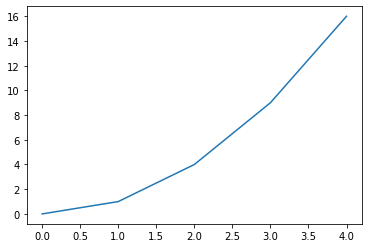

In [677]:
import matplotlib.pyplot as plt

plt.plot([0,1,4,9,16])

If for some reason you'd like to suppress the printing of that object, in the IPython Shell you can add a semi-colon at the end of the line and that will do the job.

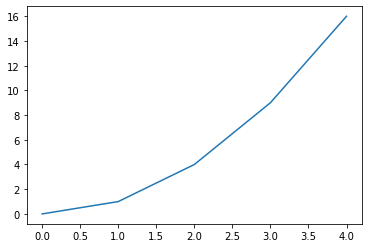

In [678]:
plt.plot([0,1,4,9,16]);

While working in a Python Shell, not IPython Shell, we need to issue the command Show for plt to show the plot.
So try that-- plt.show. (in python Shell)

We can also give the plot function two arguments, in which case the first argument specifies the x-coordinates of the points, and the second argument the y-coordinates of the points.

In [679]:
x = np.linspace(0, 10, 20)
y = x**2.0

In [680]:
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

In [681]:
y

array([  0.        ,   0.27700831,   1.10803324,   2.49307479,
         4.43213296,   6.92520776,   9.97229917,  13.5734072 ,
        17.72853186,  22.43767313,  27.70083102,  33.51800554,
        39.88919668,  46.81440443,  54.29362881,  62.32686981,
        70.91412742,  80.05540166,  89.75069252, 100.        ])

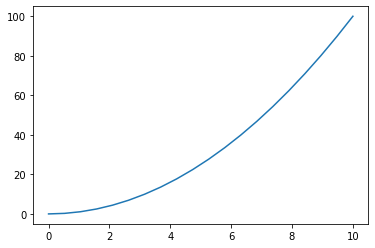

In [682]:
plt.plot(x,y);

We can also provide a third argument to the plot function, which is a format string that specifies color, marker, and line type.

In [683]:
x = np.linspace(0, 10, 20)
y1 = x**2
y2 = x**1.5

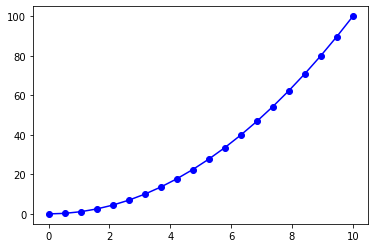

In [684]:
plt.plot(x, y1, "bo-");

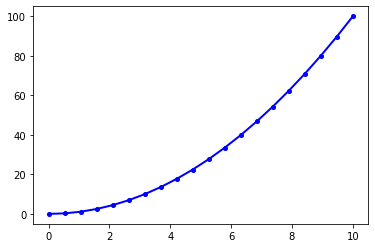

In [685]:
plt.plot(x, y1, "bo-", linewidth=2, markersize=4);

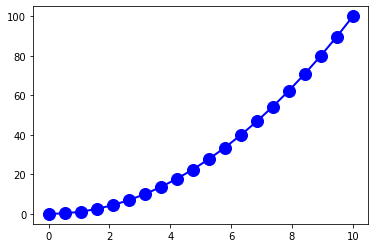

In [686]:
plt.plot(x, y1, "bo-", linewidth=2, markersize=12);

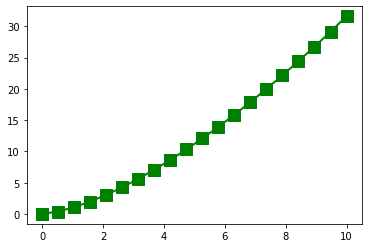

In [687]:
plt.plot(x, y2, "gs-", linewidth=2, markersize=12);

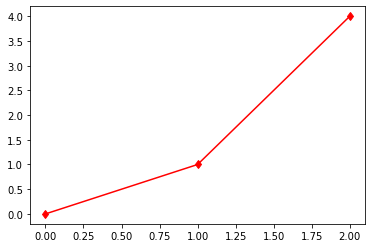

In [688]:
plt.plot([0,1,2],[0,1,4],"rd-");

Customizing Plots:

- Add legend: legend()
- Adjust axes: axis()
- Set axis labels: xlabel(), ylabel()
-Save figure: savefig() 

plt also knows LaTeX.

use axis function to adjust the axes.
- The first argument is going to be xmin.
- The second one is xmax.
- The third one is ymin.
- And the fourth one is ymax.

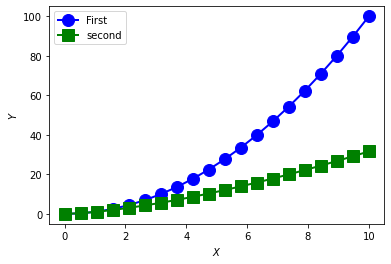

In [689]:
x = np.linspace(0, 10, 20)
y1 = x**2
y2 = x**1.5

plt.plot(x, y1, "bo-", linewidth=2, markersize=12, label="First");
plt.plot(x, y2, "gs-", linewidth=2, markersize=12, label="second");
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.axis([-0.5, 10.5, -5, 105])
plt.legend(loc="upper left")
plt.savefig("myplot.pdf")

Plotting Using Logarithmic Axes

The logarithm is taken by default in base 10.
So if, for example, log of 100 is equal to 2, but the base can be specified to be something else as needed.

The plt functions that I used to make logarithmic plots are the following:
- semilogx() plots the x-axes on a log scale and the y in the original scale
- semilogy() plots the y-axes on the log scale and the x in the original scale
- loglog() plots both x and y on logarithmic scales.

you can use to plt function we have just discussed, plt.plot.

Logarithmic scales are important in some cases

Consider the following equation:

$y=x^{\alpha}$

In Logarithmic scale it transforms to 
$\log(y)=\alpha \log(x)$

which can be thought of as $y^{\prime} = \alpha x^{\prime}$

This will be a line with slope $\alpha$

<ipython-input-690-3c76c66728f4>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([-0.5, 10.5, -5, 105])
<ipython-input-690-3c76c66728f4>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([-0.5, 10.5, -5, 105])


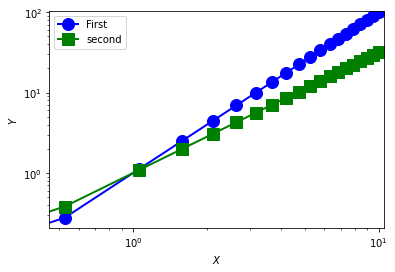

In [690]:
x = np.linspace(0, 10, 20)
y1 = x**2
y2 = x**1.5

plt.loglog(x, y1, "bo-", linewidth=2, markersize=12, label="First");
plt.loglog(x, y2, "gs-", linewidth=2, markersize=12, label="second");
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.axis([-0.5, 10.5, -5, 105])
plt.legend(loc="upper left")

If equal spacing is desired in logarithmic scale for plots better use logspace instead of linspace

<ipython-input-691-fdf4c00f5be2>:9: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([-0.5, 10.5, -5, 105])
<ipython-input-691-fdf4c00f5be2>:9: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.axis([-0.5, 10.5, -5, 105])


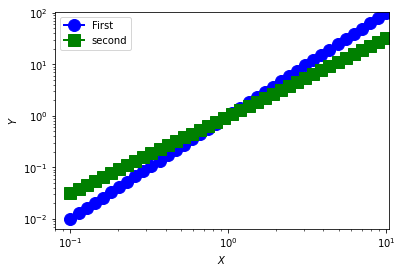

In [691]:
x = np.logspace(-1, 1, 40)
y1 = x**2
y2 = x**1.5

plt.loglog(x, y1, "bo-", linewidth=2, markersize=12, label="First");
plt.loglog(x, y2, "gs-", linewidth=2, markersize=12, label="second");
plt.xlabel("$X$")
plt.ylabel("$Y$")
plt.axis([-0.5, 10.5, -5, 105])
plt.legend(loc="upper left")

# In this case, all of the points along the x-axis are evenly spaced.

Consider the following code:

```python
x = np.logspace(0,1,10)
y = x**2
plt.loglog(x,y,"bo-")
```
What does this return? ==> A logarithmic plot that looks like a straight line with equal spacing

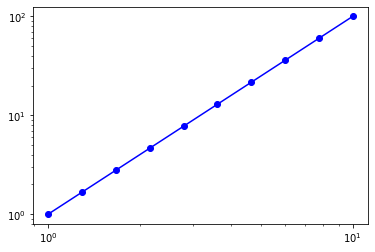

In [692]:
x = np.logspace(0,1,10)
y = x**2
plt.loglog(x,y,"bo-")

Histograms and Subplots

first generate some random numbers.

In this case, we'll use the np random normal function to generate 1,000 samples or draws from the standard normal distribution, which is a special case of the normal distribution that has mean equal to 0 and variance equal to 1.

In [693]:
x = np.random.normal(size=1000)

(array([  9.,  33., 108., 184., 223., 207., 143.,  60.,  27.,   6.]),
 array([-2.87878388, -2.28202361, -1.68526335, -1.08850308, -0.49174282,
         0.10501745,  0.70177772,  1.29853798,  1.89529825,  2.49205851,
         3.08881878]),
 <BarContainer object of 10 artists>)

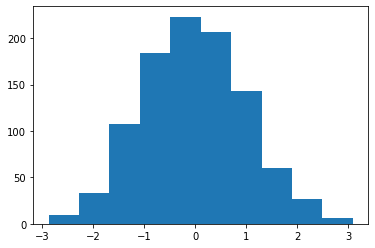

In [694]:
plt.hist(x)

I'll show how to normalize the histogram and how to provide locations of bin edges that are used to construct the histogram.

By default, hist uses 10 evenly spaced bins and it tries to optimize both bin width and bin locations.

But sometimes you really want to be able to specify the bins yourself.

When we set normed to be true, the histogram, in this case on the y-axis, instead of having the number of observations that fall in each bin, we have the proportion of observations that fall in each bin.

That's what it means for a histogram to be normalized.

(array([0.01508143, 0.05529859, 0.1809772 , 0.30833152, 0.3736844 ,
        0.34687296, 0.23962721, 0.10054289, 0.0452443 , 0.01005429]),
 array([-2.87878388, -2.28202361, -1.68526335, -1.08850308, -0.49174282,
         0.10501745,  0.70177772,  1.29853798,  1.89529825,  2.49205851,
         3.08881878]),
 <BarContainer object of 10 artists>)

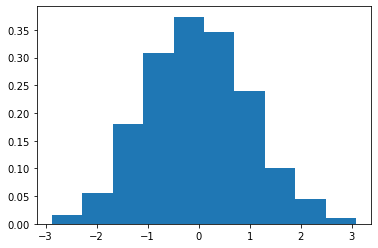

In [695]:
plt.hist(x, density=True) # density since normed is deprecated in recent version of matplotlib

To provide the location of the bins, we used a keyword argument called bins.

I'm going to construct the bins using the np.linspace function.

Remember, the first argument is the starting point.

I'm going to start at 5, minus 5.

I want to go all the way to plus 5.

And I'd like to have 21 points.

In this case, you see that the histogram looks different.

That's because we have specified 20 bins between the numbers minus 5 and plus 5.

In the previous example, we generated 21 points to get 20 bins.

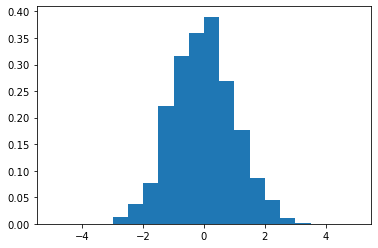

In [696]:
plt.hist(x, density=True, bins=np.linspace(-5,5,21));

gamma distribution.

It is a continuous probability density function that starts at 0 and goes all the way to positive infinity.

The gamma distribution, like the normal distribution, has two parameters.

In [697]:
x = np.random.gamma(2,3,100000)

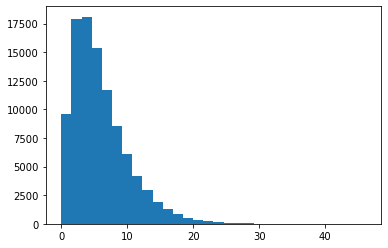

In [698]:
plt.hist(x,bins=30);

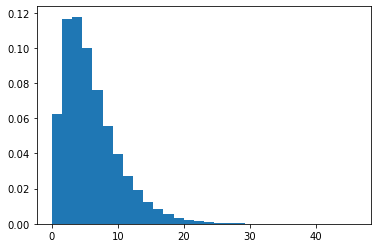

In [699]:
plt.hist(x, density=True,bins=30); # normalized

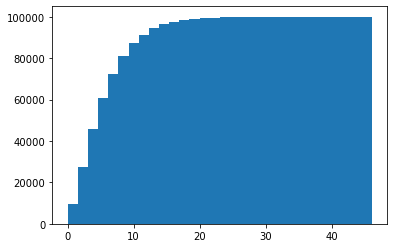

In [700]:
plt.hist(x, cumulative=True,bins=30); # cumulative

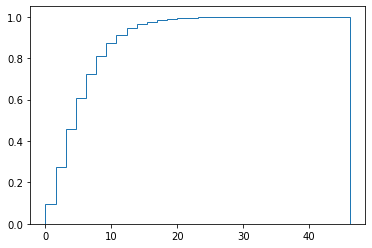

In [701]:
plt.hist(x, density=True,cumulative=True,bins=30, histtype="step"); # normalized and cumulative step histogram

Subplots in a fugure

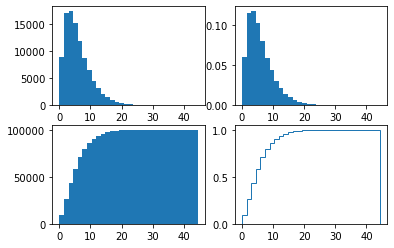

In [702]:
x = np.random.gamma(2,3,100000)
plt.figure()
plt.subplot(221)
plt.hist(x,bins=30);
plt.subplot(222)
plt.hist(x, density=True,bins=30); # normalized
plt.subplot(223)
plt.hist(x, cumulative=True,bins=30); # cumulative
plt.subplot(224)
plt.hist(x, density=True,cumulative=True,bins=30, histtype="step"); # normalized and cumulative step histogram

Will plt.subplot(3, 3, 3) create a different plot from plt.subplot(333)? ==> No

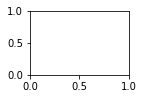

In [703]:
plt.subplot(3,3,3);

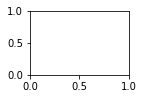

In [704]:
plt.subplot(333);

## Randomness and Time

Simulating Randomness

Many processes in nature involve randomness in one form or another.

Whether we investigate the motions of microscopic molecules or study the popularity of electoral candidates, we see randomness, or at least apparent randomness, almost everywhere.

In addition to phenomena that are genuinely random, we often use randomness when modeling complicated systems to abstract away those aspects of the phenomenon for which we do not have useful simple models.

We model what we can, and whatever it happens to be left out, we attribute to randomness.

These are just some of the reasons why it's important to understand how to simulate random numbers and random processes using Python.

random choice function to carry out perhaps the simplest random process - the flip of a single coin.

In [705]:
import random

In [706]:
random.choice(["H", "T"])

'T'

In [707]:
random.choice(["H", "T"])

'T'

In [708]:
random.choice(["H", "T"])

'H'

In [709]:
random.choice(["H", "T"])

'H'

In [710]:
random.choice(["H", "T"])

'T'

In [711]:
random.choice(["H", "T"])

'T'

Often it's more useful, however, to re-label the side of the coin with 0 to 1.

In [712]:
random.choice([0, 1])

0

In [713]:
random.choice([0, 1])

1

Outcome of a die - between 1 and 6

In [714]:
random.choice([1,2,3,4,5,6])

6

In [715]:
random.choice([1,2,3,4,5,6])

1

In [716]:
random.choice(range(1,7))

2

In [717]:
random.choice(range(1,7))

3

In [718]:
random.choice(range(1,7))

1

Not just list but any sequence object can be provided to random.choice()

Imagine a situation where you have three dice, one of them having six faces, one of them having eight faces, and one of them having ten faces.

How could you simulate one outcome for a process, where one of these dice, chosen uniformly at random, is rolled just one time?

In [719]:
random.choice(random.choice([range(1,7), range(1,9), range(1,11)]))

4

In [720]:
random.choice(random.choice([range(1,7), range(1,9), range(1,11)]))

1

In [721]:
random.choice(random.choice([range(1,7), range(1,9), range(1,11)]))

4

In [722]:
random.choice(random.choice([range(1,7), range(1,9), range(1,11)]))

3

In [723]:
random.choice(random.choice([range(1,7), range(1,9), range(1,11)]))

6

What will random.choice(list([1,2,3,4])) produce? ==> A value from 1 to 4, selected at random.

In [724]:
random.choice(list([1,2,3,4]))

2

### Examples Involving Randomness

simulations of randomness and data visualization

Our first example is to roll the die 100 times and plot a histogram of the outcomes, meaning a histogram that shows how frequent the numbers from 1 to 6 appeared in the 100 samples.

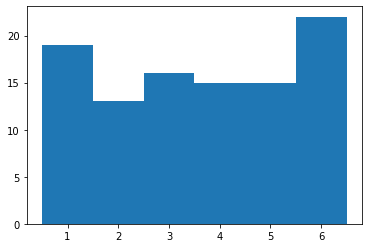

In [725]:
import random

rolls = []
for k in range(100):
    rolls.append(random.choice([1,2,3,4,5,6]))
plt.hist(rolls, bins=np.linspace(0.5, 6.5, 7));

# The starting point is going to be 0.5. The ending point is going to be 6.5. And because I would like to have six bins,I need seven evenly spaced points.

Here we would have intuitively expected a relatively flat histogram.

But what's a more rigorous justification for this result?

The law of large numbers, which is a theorem of probability, tells us that we should expect more or less the same number of 1s and 2s all the way to the 6s because they each have the same probability.

And we've repeated the experiment-- the role of a die-- a large number of times.

Well, actually 100 is not such a large number.

So we can see what happens if we increase that number.

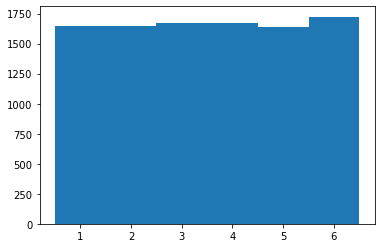

In [726]:
import random

rolls = []
for k in range(10000):
    rolls.append(random.choice([1,2,3,4,5,6]))
plt.hist(rolls, bins=np.linspace(0.5, 6.5, 7));

# The starting point is going to be 0.5. The ending point is going to be 6.5. And because I would like to have six bins,I need seven evenly spaced points.

Histogram is more falt in this case

Now lets try for 1 million times

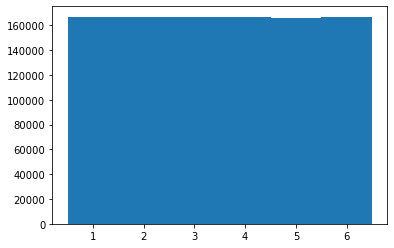

In [727]:
import random

rolls = []
for k in range(1000000):
    rolls.append(random.choice([1,2,3,4,5,6]))
plt.hist(rolls, bins=np.linspace(0.5, 6.5, 7));

# The starting point is going to be 0.5. The ending point is going to be 6.5. And because I would like to have six bins,I need seven evenly spaced points.

Histogram is almost completely flat

Considering now rolling not one die, but 10 independent dies denoted with x1 to x10.

We're going to define a new random variable called y, which is the sum of all of the 10x variables.

$Y = X_1 + X_2 + \cdots + X_10$

The larger number of samples of y we use, the smoother the histogram becomes.

First, since each x variable is at least 1, and we're summing 10 of them together, the least value y can assume is 10.

By similar logic, the greatest value of y is 60.

Let's now think about these two extremes-- say, the number 60.
The only way that can occur if all 10 dice give a 6, which is very unlikely.

But if we think about some intermediate value such as number 30, there are many combinations of die rolls that could give us that value.

Because rolling 10 6s is just as likely or unlikely as rolling 10 1s, or 10 of anything, we would expect the histogram to peak at the center.

And we'd also expect it to be very thin towards the ends as we get closer to either 10 or 60.

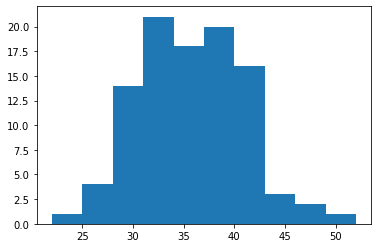

In [728]:
import random

ys = []

for rep in range(100):
    y = 0
    for k in range(10):
        x = random.choice([1,2,3,4,5,6])
        y += x
    ys.append(y)

plt.hist(ys);

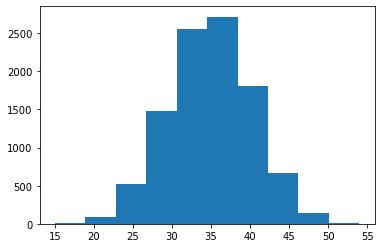

In [729]:
import random

ys = []

for rep in range(10000):
    y = 0
    for k in range(10):
        x = random.choice([1,2,3,4,5,6])
        y += x
    ys.append(y)

plt.hist(ys);

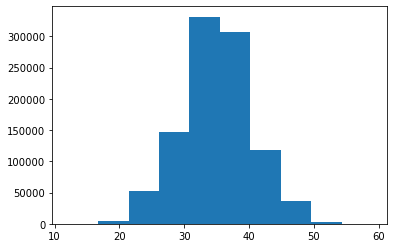

In [730]:
import random

ys = []

for rep in range(1000000):
    y = 0
    for k in range(10):
        x = random.choice([1,2,3,4,5,6])
        y += x
    ys.append(y)

plt.hist(ys);

Central Limit Theorem, or CLT, states that the sum of a large number of random variables regardless of their distribution will approximately follow a normal distribution.

The central limit theorem not only helps us understand our simulation results, but it also explains why the normal distribution, sometimes called a Gaussian distribution, occurs so often.

For example, the height of a person probably depends on a large number of factors that are related to things like genetics, nutrition, environment, and so on.

If we think of height as being a random variable that itself consists of a large number of other random variables that are added together, we would expect the height of a person in a population to follow the normal distribution.

That is, in fact, what we know to be the case from empirical data.

What is the law of large numbers with respect to histograms?

a) We expect the histogram of a sample to better reflect the distribution as the sample size increases.

b) We expect the histogram of a sample to become more smooth as the sample size increases.

c) We expect the histogram of a sample to become more flat as the sample size increases.

d) All numbers in the histogram are very large, by law.

Ans-> a


## NumPy Random Module

NumPy makes it possible to generate all kinds of random variables.

The reason for using NumPy to deal with random variables is that first, it has a broad range of different kinds of random variables.

And second, it's also very fast.

In [731]:
# numpy 0 to 1 uniform distribution

import numpy as np
np.random.random()


0.6856471080607528

In [732]:
np.random.random()

0.772729380833096

In [733]:
# 1d array of above random numbers

np.random.random(5)

array([0.40931442, 0.54264951, 0.58564799, 0.37865983, 0.87506994])

In [734]:
# 2d array of above random numbers

np.random.random((5,3))

array([[0.50167883, 0.73211653, 0.56044062],
       [0.81015433, 0.08062444, 0.67412496],
       [0.4337435 , 0.74715824, 0.50085315],
       [0.90568256, 0.99088883, 0.47952092],
       [0.96540337, 0.79285008, 0.14057064]])

There are an endless number of different distributions depending on the parameter values.

But only the one with mean equal to 0 and a standard deviation equal 1 one has its own name-- the standard normal distribution.

To generate random numbers from the standard normal distribution, or from the normal distribution in general, we will be using the np dot random dot normal function.

The first argument is the mean of the distribution, in this case 0.

And the second argument is the standard deviation, which is equal to 1.

In [735]:
np.random.normal(0,1)

0.4668759831127163

In [736]:
# 1d array of above standard normal distribution

np.random.normal(0,1,5)

array([ 1.20528563, -0.95380825,  1.19623516, -0.58858615, -0.43393388])

In [737]:
# 2d array of above standard normal distribution

np.random.normal(0, 1, (5,3))

array([[-0.93152017, -1.06820543,  0.10038492],
       [-1.36389493, -0.36454646, -1.2417117 ],
       [ 0.00728646, -0.01552118, -0.71921398],
       [-0.71034442, -0.89287647,  0.43811454],
       [ 0.03003879,  3.33071872, -1.13597013]])

Generate random integers in numpy

In [738]:
# 1d 
np.random.randint(1,7)

4

In [739]:
# 2d

X = np.random.randint(1, 7, (10,3))
X

array([[2, 2, 2],
       [1, 3, 3],
       [2, 5, 4],
       [3, 1, 2],
       [5, 5, 3],
       [3, 1, 1],
       [1, 2, 5],
       [3, 4, 6],
       [5, 4, 2],
       [2, 2, 4]])

Sum in NumPy

Only one argument, a, is necessary, which is the array of elements.

The second optional argument is called axis.

When using two dimensional or higher dimensional arrays, we need to specify the dimension on which the sum is taken.

If we type np.sum, we get a sum over all of the elements of the array.

We can also specify the axis or dimension along which we would like to take a sum.

We can also provide the optional argument axis, in this case equal to 0, in which case we are summing over all of the rows of the array.

We can also try summing over dimension 1, in which case we're summing over all of the columns.

If we had a three-dimensional array, to sum over the third dimension, we could set the argument axis equal to 2.

In [740]:
#sum of all elements
np.sum(X)

88

In [741]:
# sum over all rows
np.sum(X, axis=0)

array([27, 29, 32])

In [742]:
# sum over all columns
np.sum(X, axis=1)

array([ 6,  7, 11,  6, 13,  5,  8, 13, 11,  8])

Let's revisit our example where we roll 10 die and added the result together.

Remember, we defined a random variable y as the sum of random variables x1 through x10, where each x variable is a standard die with 6 faces with the numbers from 1 to 6 on them.

We can code this example using NumPy arrays.

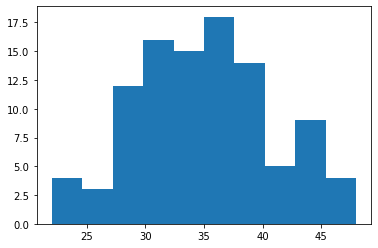

In [743]:
# 100 rows

X = np.random.randint(1, 7, (100,10))
Y = np.sum(X, axis=1)
plt.hist(Y);

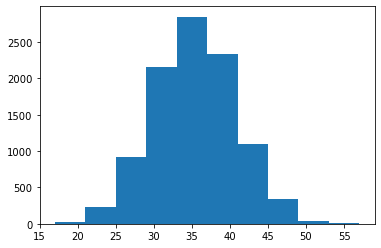

In [744]:
# 10000 rows

X = np.random.randint(1, 7, (10000,10))
Y = np.sum(X, axis=1)
plt.hist(Y);

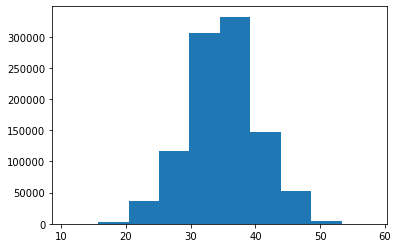

In [745]:
# 1000000 rows

X = np.random.randint(1, 7, (1000000,10))
Y = np.sum(X, axis=1)
plt.hist(Y);

Generally, using NumPy can result in code that runs over 10 times faster than standard Python code.

In scientific computation, this makes a big difference.


## Measuring Time

time.clock function - gives us the current time. (It has been deprecated)

- Processor Time: This is how long this specific process spends actively being executed on the CPU. Sleep, waiting for a web request, or time when only other processes are executed will not contribute to this.

    - Use time.process_time()
- Wall-Clock Time: This refers to how much time has passed "on a clock hanging on the wall", i.e. outside real time.

    - Use time.perf_counter()

        - time.time() also measures wall-clock time but can be reset, so you could go back in time
        - time.monotonic() cannot be reset (monotonic = only goes forward) but has lower precision than time.perf_counter() 


Refer [Stack Overflow - AttributeError: module 'time' has no attribute 'clock' in Python 3.8](https://stackoverflow.com/questions/58569361/attributeerror-module-time-has-no-attribute-clock-in-python-3-8)

In [746]:
import time

In [747]:
start_time = time.perf_counter()
start_time

1319.7441755

In [748]:
end_time = time.perf_counter()
end_time

1319.8433584

In [749]:
end_time - start_time

0.09918289999995977

In [750]:
# first implementation using python and not numpy
start_time = time.perf_counter()
ys = []
for rep in range(1000000):
    y = 0
    for k in range(10):
        x = random.choice([1,2,3,4,5,6])
        y += x
    ys.append(y)

end_time = time.perf_counter()
implementationUsingPython = end_time - start_time
print(f"Time elapsed is {implementationUsingPython}")

Time elapsed is 13.96652210000002


In [751]:
# second implementation using numpy
start_time = time.perf_counter()
X = np.random.randint(1, 7, (1000000, 10))
Y = np.sum(X, axis=1)
end_time = time.perf_counter()
implementationUsingNumpy = end_time - start_time
print(f"Time elapsed is {implementationUsingNumpy}")

Time elapsed is 0.17094760000009046


In [752]:
print(f"Numpy is {implementationUsingPython/implementationUsingNumpy} times faster")

Numpy is 81.70060357672544 times faster


## Random Walks

Random walks have many uses.

They can be used to model random movements of molecules, but they can also be used to model spatial trajectories of people, the kind we might be able to measure using GPS or similar technologies.

There are many different kinds of random walks, and properties of random walks are central to many areas in physics and mathematics.

$X(t=0) = X_0$

$X(t=1) = X(t=0) + \Delta \times (t=1) = X_0 + \Delta \times (t=1)$

$X(t=2) = X(t=1) + \Delta \times (t=2) = X_0 + \Delta \times (t=1) + \Delta \times (t=2)$

$X(t=k) = X(t=k-1) + \Delta \times (t=k) = X_0 + \Delta \times (t=1) + \Delta \times (t=2) + \cdots + \Delta \times (t=k)$

Let's try coding up random walker in NumPy, where we start at the origin, take 100 steps, and where each step is sampled from the standard normal distribution.

The normal distribution having mean 0 and standard deviation equal to 1.

We're also going to assume that the x displacement and the y displacement for any given step are independent

Starting with just five steps.

Let's generate a two by five table of numbers for each element, each of the 10 numbers is drawn independently from a standard normal distribution.

delta_X: [[ 0.04917887 -0.66108188  0.044369   -0.06195356  0.40852058]
 [ 1.3954566   0.45188255 -0.30362601 -2.29763097  0.22875372]]


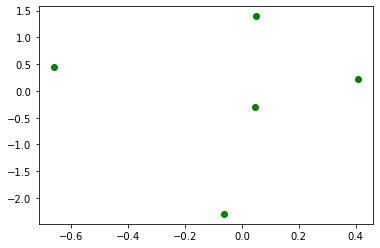

In [753]:
delta_X = np.random.normal(0, 1, (2,5))
print(f"delta_X: {delta_X}")
plt.plot(delta_X[0], delta_X[1], "go");

Cummulative Sum for 

 delta_X = [[ 0.04917887 -0.66108188  0.044369   -0.06195356  0.40852058]
 [ 1.3954566   0.45188255 -0.30362601 -2.29763097  0.22875372]] 

 is 

 X = [[ 0.04917887 -0.61190301 -0.56753401 -0.62948757 -0.22096699]
 [ 1.3954566   1.84733915  1.54371314 -0.75391783 -0.52516411]]


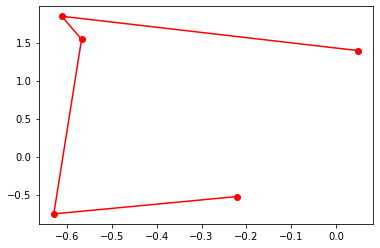

In [754]:
# Cumulative Sum

X = np.cumsum(delta_X, axis=1)
print(f"Cummulative Sum for \n\n delta_X = {delta_X} \n\n is \n\n X = {X}")

plt.plot(X[0], X[1], "ro-");
plt.savefig("rw.pdf")

This shows us the first four steps of the random walk, but there is one problem here.

Remember how the random walk was supposed to start at the origin, at location is 0,0?

Right now we're missing that very first point.

But let's add that element to our array.

In this case the origin is represented by a two by one array consisting of 0s.

And we'd like to concatenate that to our array called X.

So the missing step for us to do is to generate the array X_0.

And we know that this is an NumPy array.

It consists of two rows, each having just one element, 0.

These array X_0 gives us the initial location of the random walker.

In [755]:
X_0 = np.array(([0], [0]))
X_0

array([[0],
       [0]])

Cummulative Sum for 

 delta_X = [[ 1.34095086 -0.89895179  1.20164352  0.78569158  1.49896007]
 [ 0.26396686  0.74508445 -1.72707444 -0.17284406 -0.10243169]] 

 is 

 X = [[ 0.          1.34095086  0.44199907  1.64364259  2.42933417  3.92829423]
 [ 0.          0.26396686  1.00905131 -0.71802313 -0.89086719 -0.99329888]]


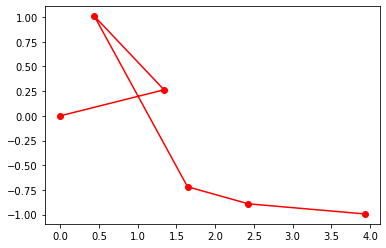

In [756]:
# Cumulative Sum with origin added for 5 steps

X_0 = np.array(([0], [0]))

delta_X = np.random.normal(0, 1, (2,5))

X = np.concatenate((X_0, np.cumsum(delta_X, axis=1)), axis=1)
print(f"Cummulative Sum for \n\n delta_X = {delta_X} \n\n is \n\n X = {X}")

plt.plot(X[0], X[1], "ro-");
plt.savefig("rw2.pdf")

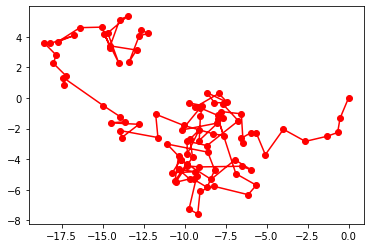

In [757]:
# Cumulative Sum with origin added for 100 steps

X_0 = np.array(([0], [0]))

delta_X = np.random.normal(0, 1, (2,100))

X = np.concatenate((X_0, np.cumsum(delta_X, axis=1)), axis=1)
# print(f"Cummulative Sum for \n\n delta_X = {delta_X} \n\n is \n\n X = {X}")

plt.plot(X[0], X[1], "ro-");
plt.savefig("rw3.pdf")

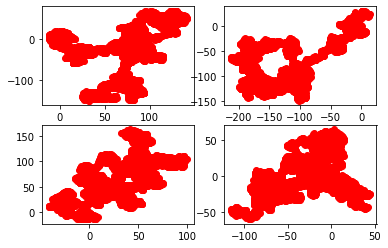

In [758]:
# Cumulative Sum with origin added for 10000 steps for 4 different epoch

X_0 = np.array(([0], [0]))

plt.figure()

for epoch in range(4):
    delta_X = np.random.normal(0, 1, (2,10000))

    X = np.concatenate((X_0, np.cumsum(delta_X, axis=1)), axis=1)
    # print(f"Cummulative Sum for \n\n delta_X = {delta_X} \n\n is \n\n X = {X}")
    
    plt.subplot(2,2,epoch+1)
    plt.plot(X[0], X[1], "ro-");

plt.savefig("rw4.pdf")

How are the displacements, the individual steps, in the random walk related to one another?

a) Any two consecutive displacements are independent of one another. correct

b) Any two consecutive locations that the random walk visits are independent of one another.

Ans -> a 

What does np.concatenate do?

a) Takes an iterable of np.arrays as arguments, and binds them along the axis argument.

b) Takes any number of np.array arguments, and binds them along the axis argument.

c) Takes an iterable of np.arrays as arguments, and sums them along the axis argument.

d) Takes any number of np.array arguments, and sums them along the axis argument.

Ans -> a